In [1]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
import copy
import random
import matplotlib.pyplot as plt

# Preprocessing Data in Python

* [Dealing with Missing Data](#Dealing-with-Missing-Data)
    * [Imputing missing values using the mean strategy](#Imputing-missing-values-using-the-mean-strategy)
    * [Imputing missing values using the median strategy](#Imputing-missing-values-using-the-median-strategy)
    * [Imputing missing values using the most frequent strategy](#Imputing-missing-values-using-the-most-frequent-strategy)
    * [Comparing the strategies](#Comparing-the-strategies)

Consider the [advertising example](https://hatefdastour.github.io/files/Statistical_Learning/Linear_Regression.html) again.

In [2]:
df = pd.read_csv('../Data/Advertising.csv')
df.head()

TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9

We are going to randomly add **NaN** values to the data, and call the resulting data the corrupted data.

In [3]:
dfC=copy.deepcopy(df)
# nr: the number of rows
# nc: the number of columns
[nr,nc]=np.shape(dfC)
# Corrupting 20 cells
N_corrupted=20
for i in range(N_corrupted):
    dfC.iloc[[random.randint(1,nr-1)],[random.randint(1,nc-1)]]=np.nan

In [4]:
# the corrupted data
dfC.head()

TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5    NaN       58.5   18.5
4  180.8   10.8       58.4   12.9

As can be seen, some of the data are in forms of *NaN*. NaN stands for *Not a Number*. Thus, we need to preprocess the data in order to analyze them using statistical tools.

## Dealing with Missing Data

We can use the [[SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html#sklearn.impute.SimpleImputer)] for imputing missing values. This can be done by a provided constant value or using the statistics (mean, median or mode (most frequent)) of each column.

### Imputing missing values using the mean strategy

First, we are going to implement SimpleImputer with the mean strategy.

In [5]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
## imputing the data
X=imp_mean.fit_transform(dfC.iloc[:,:-1].values)
Y=imp_mean.fit_transform(dfC.iloc[:,-1].values.reshape(-1,1))
# Creating a new dataframe
df_imp_mean=copy.deepcopy(df)
df_imp_mean.iloc[:,:-1]=X
df_imp_mean.iloc[:,-1]=Y
del X, Y
df_imp_mean.head()

TV      Radio  Newspaper  Sales
0  230.1  37.800000       69.2   22.1
1   44.5  39.300000       45.1   10.4
2   17.2  45.900000       69.3    9.3
3  151.5  22.975916       58.5   18.5
4  180.8  10.800000       58.4   12.9

Thus, we have managed to impute those NaN values using SimpleImputer with the mean strategy. Now we can analyze it using statistical tools.

To compare it with the original Data, we can

In [20]:
df_imp_mean.where(df_imp_mean.values==df.values).notna().head()

TV  Radio  Newspaper  Sales
0  True   True       True   True
1  True   True       True   True
2  True   True       True   True
3  True  False       True   True
4  True   True       True   True

### Imputing missing values using the median strategy

Next, we can implement try the median strategy.

In [7]:
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
## imputing the data
X=imp_median.fit_transform(dfC.iloc[:,:-1].values)
Y=imp_median.fit_transform(dfC.iloc[:,-1].values.reshape(-1,1))
# Creating a new dataframe
df_imp_median=copy.deepcopy(df)
df_imp_median.iloc[:,:-1]=X
df_imp_median.iloc[:,-1]=Y
del X, Y
df_imp_median.head()

TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   22.3       58.5   18.5
4  180.8   10.8       58.4   12.9

Comparing with the original data:

In [19]:
df_imp_median.where(df_imp_median.values==df.values).notna().head()

TV  Radio  Newspaper  Sales
0  True   True       True   True
1  True   True       True   True
2  True   True       True   True
3  True  False       True   True
4  True   True       True   True

### Imputing missing values using the most frequent strategy

Finally, the most frequent strategy:

In [9]:
imp_mf = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
## imputing the data
X=imp_mf.fit_transform(dfC.iloc[:,:-1].values)
Y=imp_mf.fit_transform(dfC.iloc[:,-1].values.reshape(-1,1))
# Creating a new dataframe
df_imp_mf=copy.deepcopy(df)
df_imp_mf.iloc[:,:-1]=X
df_imp_mf.iloc[:,-1]=Y
del X, Y
df_imp_mf.head()

TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5    4.1       58.5   18.5
4  180.8   10.8       58.4   12.9

Comparing with the original data:

In [18]:
df_imp_mf.where(df_imp_mf.values==df.values).notna().head()

TV  Radio  Newspaper  Sales
0  True   True       True   True
1  True   True       True   True
2  True   True       True   True
3  True  False       True   True
4  True   True       True   True

### Comparing the strategies

To compare the accuray, we can use the following norm.

$$\max\left(\left| \text{Original}-\text{Imputed Data}\right|\right)$$

In [26]:
# Norm: the mean strategy
np.max(np.abs(df.values-df_imp_mean.values))

26.42408376963351

In [27]:
# Norm: the median frequent strategy
np.max(np.abs(df.values-df_imp_median.values))

27.099999999999998

In [28]:
# Norm: the most frequent strategy
np.max(np.abs(df.values-df_imp_mf.values))

45.3

As can be seen, here, the mean strategy has provided the best results. Although, on a different example, other strategies might perform better than the mean strategy.

Now Plots:

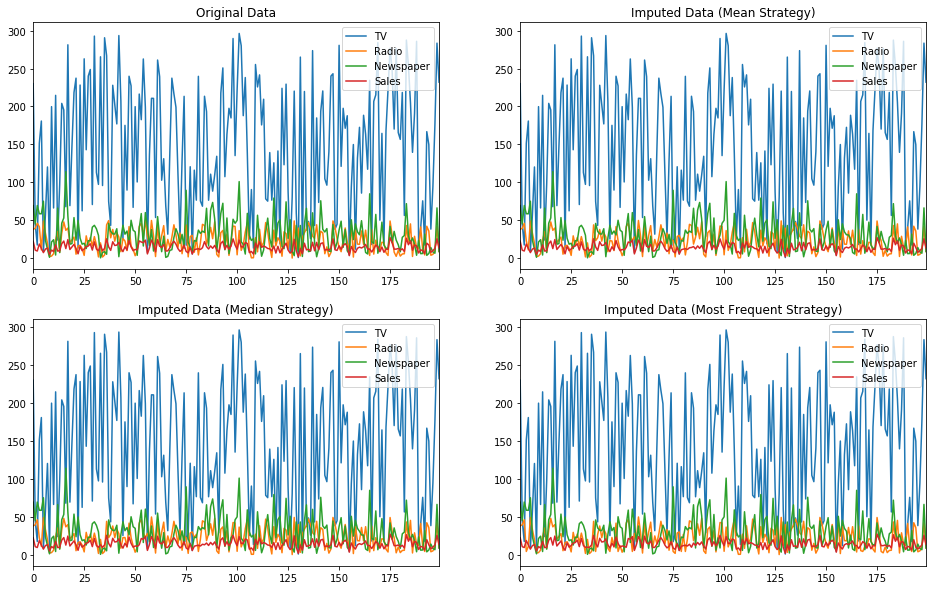

In [29]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 10), sharex=False)
#
axes[0,0].set_title('Original Data');
df.plot(ax=axes[0,0])
#
axes[0,1].set_title('Imputed Data (Mean Strategy)');
df_imp_mean.plot(ax=axes[0,1])
#
axes[1,0].set_title('Imputed Data (Median Strategy)');
df_imp_median.plot(ax=axes[1,0])
#
axes[1,1].set_title('Imputed Data (Most Frequent Strategy)');
df_imp_mf.plot(ax=axes[1,1])